In [ ]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 읽어오기
data = pd.read_excel('/content/drive/MyDrive/retail_sales_dataset.xlsx')

In [ ]:
# 데이터셋 확인
print(data)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

# 1. 데이터 기본 탐색 및 EDA(Exploratory Data Analysis)

## 데이터 구조 및 분포 파악

In [ ]:
# 데이터의 행과 열의 수를 출력

rows, columns = data.shape
print(f"행(Row)의 수: {rows} 개, 열(Column)의 수: {columns} 개")

행(Row)의 수: 1000 개, 열(Column)의 수: 9 개


In [ ]:
# 전체적인 데이터 확인
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
"""
>> 각 Feature 정보 정리
- Transaction ID : 아이디
- Date : 구매 날짜
- Customer ID : 고객 아이디 (Transaction ID 앞에 CUST만 붙임)
- Gender : 성별 (Male 490명, Female 510명)
- Age : 나이 (18 ~ 64세로 분포)
- Product Category : 구매 상품 카테고리 (Clothing 351개, Electronics 342개, Beauty 307개로 구성)
- Quantity : 구매한 양 (1 <= Quantity <= 4)
- Price per Unit : 단위 당 가격 (25 <= Price per Unit <= 500)
- Total Amount : Quantity * Price per Unit (25 <= Total Amount <= 2000)
"""

'\n>> 각 Feature 정보 정리\n- Transaction ID : 아이디\n- Date : 구매 날짜\n- Customer ID : 고객 아이디 (Transaction ID 앞에 CUST만 붙임)\n- Gender : 성별 (Male 490명, Female 510명)\n- Age : 나이 (18 ~ 64세로 분포)\n- Product Category : 구매 상품 카테고리 (Clothing 351개, Electronics 342개, Beauty 307개로 구성)\n- Quantity : 구매한 양 (1 <= Quantity <= 4)\n- Price per Unit : 단위 당 가격 (25 <= Price per Unit <= 500)\n- Total Amount : Quantity * Price per Unit (25 <= Total Amount <= 2000)\n'

In [ ]:
# Quantity, Price per Unit, Total Amount의 평균, 중앙값, 최솟값, 최대값 계산 및 출력

# 필요한 feature 열 선택하기
columns_of_interest = ['Quantity', 'Price per Unit', 'Total Amount']

# 각 열에 대해 평균, 중앙값, 최솟값, 최대값 계산
for column in columns_of_interest:
    mean_value = data[column].mean()
    median_value = data[column].median()
    min_value = data[column].min()
    max_value = data[column].max()

    print(f"'{column}' 의 통계:")
    print(f"  평균(Mean): {mean_value}")
    print(f"  중앙값(Median): {median_value}")
    print(f"  최솟값(Min): {min_value}")
    print(f"  최댓값(Max): {max_value}\n")

'Quantity' 의 통계:
  평균(Mean): 2.514
  중앙값(Median): 3.0
  최솟값(Min): 1
  최댓값(Max): 4

'Price per Unit' 의 통계:
  평균(Mean): 179.89
  중앙값(Median): 50.0
  최솟값(Min): 25
  최댓값(Max): 500

'Total Amount' 의 통계:
  평균(Mean): 456.0
  중앙값(Median): 135.0
  최솟값(Min): 25
  최댓값(Max): 2000



In [ ]:
# 고유한 고객의 수 출력

unique_customers = data['Customer ID'].nunique()
print(f"고유한 고객의 수 : {unique_customers} 명")

고유한 고객의 수 : 1000 명


In [ ]:
# 고객의 나이 빈도 및 분포 확인하기
value_counts = data['Age'].value_counts()
print(value_counts)

# 최고령과 최연소 계산
oldest_age = data['Age'].max()
youngest_age = data['Age'].min()

print(f"최고령: {oldest_age}")
print(f"최연소: {youngest_age}")

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64
최고령: 64
최연소: 18


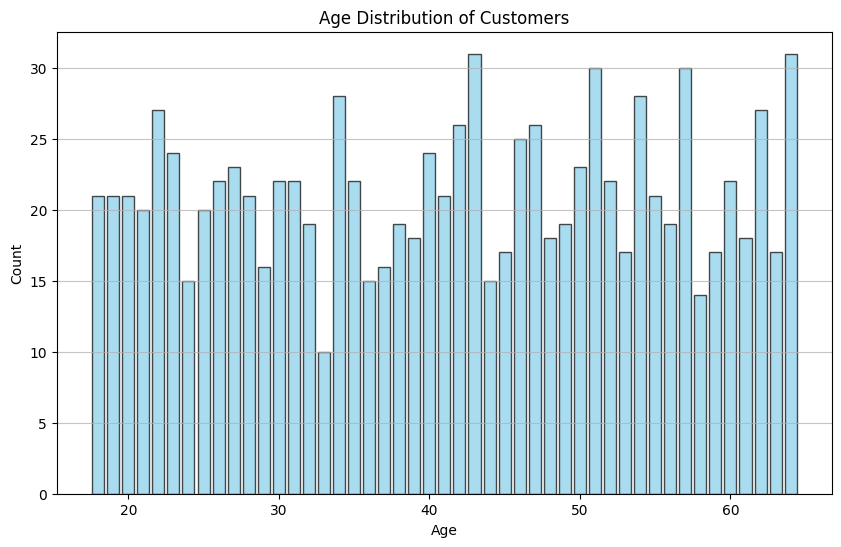

평균 연령 : 41.39 세
표준 편차 : 13.68


In [ ]:
# 고객의 연령 분포 출력/시각화. 평균 연령과 표준 편차를 계산해주세요.

# 연령 분포를 위에서 구한 value_counts() 기반으로 시각화
age_counts = data['Age'].value_counts().sort_index()  # 나이 순으로 정렬

# 시각화 -> 막대그래프로 나타내었습니다!
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 평균 연령과 표준 편차 계산
mean_age = data['Age'].mean()
std_dev_age = data['Age'].std()

print(f"평균 연령 : {mean_age:.2f} 세")
print(f"표준 편차 : {std_dev_age:.2f}")

## 카테고리와 트렌드 탐색

In [ ]:
# 제품 카테고리 수 출력

unique_categories = data['Product Category'].nunique()
print(f"제품 카테고리 수: {unique_categories}")

제품 카테고리 수: 3


제품 카테고리별 빈도:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


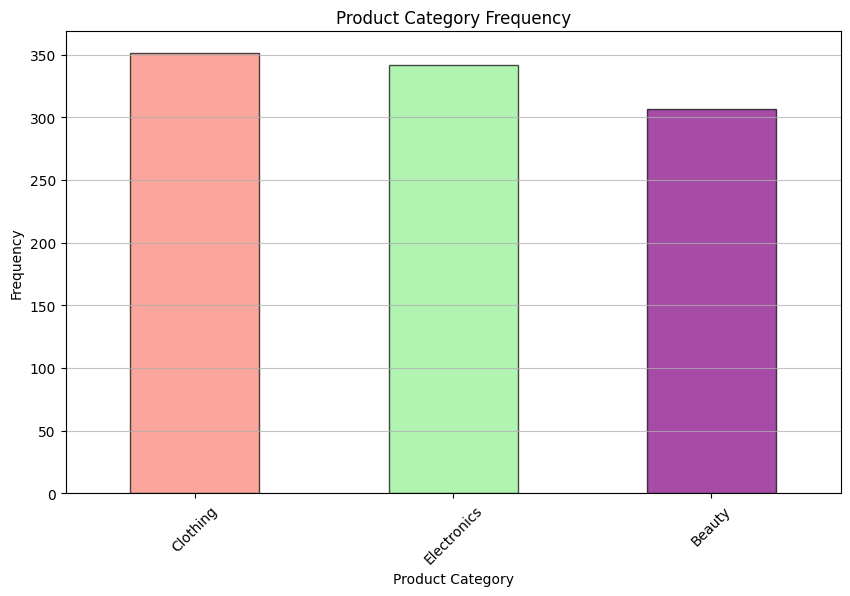

In [ ]:
# 각 카테고리 별 빈도 출력/시각화

# 각 카테고리별 빈도 계산
category_counts = data['Product Category'].value_counts()

# 빈도 출력
print("제품 카테고리별 빈도:")
print(category_counts)

# 시각화
plt.figure(figsize=(10, 6))
colors = ['salmon', 'lightgreen', 'purple']
category_counts.plot(kind='bar', color=colors[:len(category_counts)], edgecolor='black', alpha=0.7)
plt.title('Product Category Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# 총 매출 기준 가장 많은 판매가 이루어진 카테고리 출력

# 총 매출 기준 카테고리별 총합 계산하기
total_sales_by_category = data.groupby('Product Category')['Total Amount'].sum()

# 가장 많은 판매가 이루어진 카테고리
top_category = total_sales_by_category.idxmax()
top_sales = total_sales_by_category.max()

print(f"가장 많은 판매가 이루어진 카테고리: {top_category} - 총 매출: {top_sales} 원")

가장 많은 판매가 이루어진 카테고리: Electronics - 총 매출: 156905 원


In [ ]:
# 카테고리별 Quantity의 평균 출력

average_quantity_by_category = data.groupby('Product Category')['Quantity'].mean()

# 출력
print("카테고리별 Quantity 평균:")
print(average_quantity_by_category)

카테고리별 Quantity 평균:
Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64


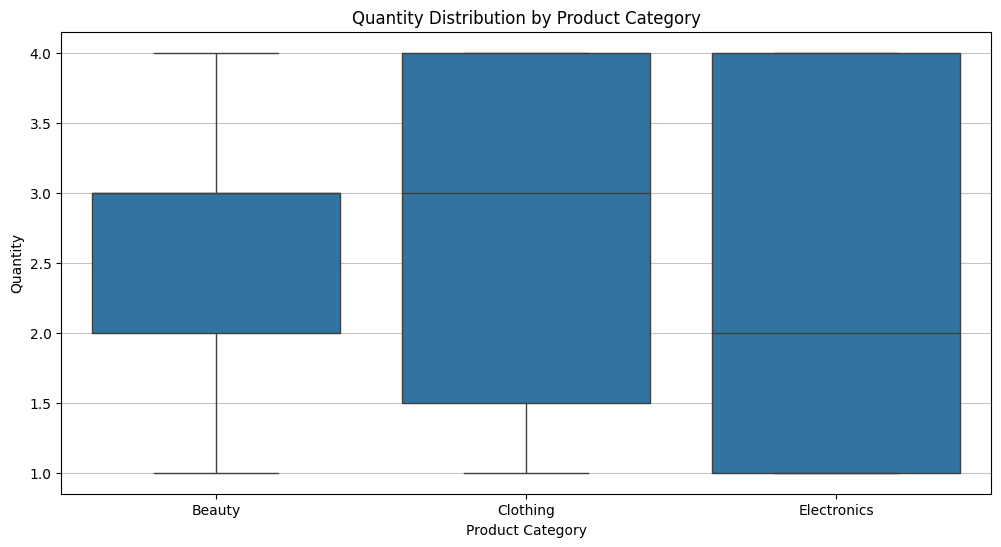


카테고리별 구매량 통계치:
                  count      mean       std  min  25%  50%  75%  max
Product Category                                                    
Beauty            307.0  2.511401  1.100668  1.0  2.0  3.0  3.0  4.0
Clothing          351.0  2.547009  1.142647  1.0  1.5  3.0  4.0  4.0
Electronics       342.0  2.482456  1.153084  1.0  1.0  2.0  4.0  4.0


In [ ]:
# 카테고리별 구매량 패턴 파악

import seaborn as sns

# 카테고리별 구매량 분포 시각화 (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Quantity', data=data)
plt.title('Quantity Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 카테고리별 구매량 통계치 계산
quantity_stats_by_category = data.groupby('Product Category')['Quantity'].describe()

print("\n카테고리별 구매량 통계치:")
print(quantity_stats_by_category)

성별에 따른 카테고리별 구매량:
Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               418       441          439
Male                 353       453          410


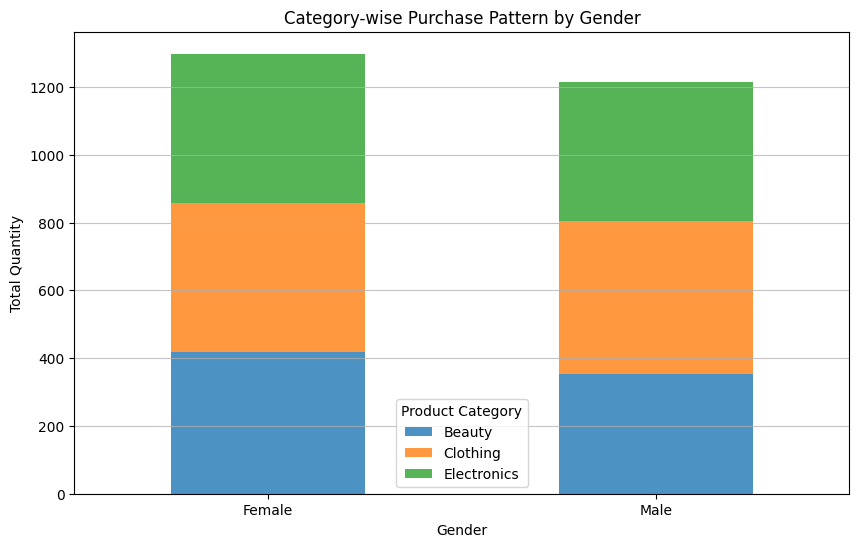

성별에 따른 카테고리별 총 매출:
Product Category  Beauty  Clothing  Electronics
Gender                                         
Female             74830     81275        76735
Male               68685     74305        80170


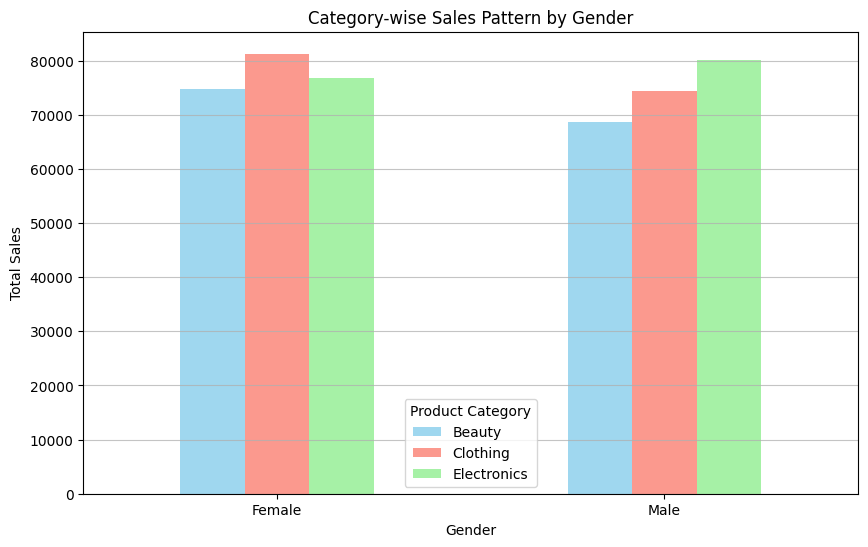

In [ ]:
# 성별에 따른 카테고리별 구매 패턴 - 특정 성별에 따른 패턴 파악

# 성별 및 카테고리별 구매량 합계 계산
gender_category_quantity = data.groupby(['Gender', 'Product Category'])['Quantity'].sum().unstack()

# 성별 및 카테고리별 구매 패턴 출력
print("성별에 따른 카테고리별 구매량:")
print(gender_category_quantity)

# 시각화: 성별에 따른 카테고리별 구매량 비교 -> 막대그래프에 누적했습니다!
gender_category_quantity.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title('Category-wise Purchase Pattern by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity')
plt.legend(title='Product Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 성별 및 카테고리별 매출 합계 계산
gender_category_sales = data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# 성별 및 카테고리별 구매 패턴 출력 (매출 기준)
print("성별에 따른 카테고리별 총 매출:")
print(gender_category_sales)

# 시각화: 성별에 따른 카테고리별 매출 비교
gender_category_sales.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Category-wise Sales Pattern by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

## 시간 기반 분석

In [ ]:
# 거래 날짜별 빈도 계산
date_counts = data['Date'].value_counts()

# 가장 빈번한 거래 날짜
most_frequent_date = date_counts.idxmax()
most_frequent_count = date_counts.max()

print(f"가장 빈번한 거래 날짜: {most_frequent_date}, 거래 횟수: {most_frequent_count} 회")

가장 빈번한 거래 날짜: 2023-05-16, 거래 횟수: 11 회


In [ ]:
# 매출 피크가 나타나는 날짜/월

# Date 열을 datetime 형식으로 변환 -> 현재 '-'로 구분되어있으므로...!
data['Date'] = pd.to_datetime(data['Date'], format='%d-%d-%d')

# 날짜별 매출 계산
date_sales = data.groupby('Date')['Total Amount'].sum()

# 매출이 가장 높은 날짜
peak_date = date_sales.idxmax()
peak_sales = date_sales.max()

print(f"매출 피크가 나타나는 날짜: {peak_date}, 매출: {peak_sales}")

# 월별 매출 계산
data['Month'] = data['Date'].dt.month  # 월 추출
month_sales = data.groupby('Month')['Total Amount'].sum()

# 매출이 가장 높은 월
peak_month = month_sales.idxmax()
peak_month_sales = month_sales.max()

print(f"매출 피크가 나타나는 월: {peak_month}, 매출: {peak_month_sales} 원")

매출 피크가 나타나는 날짜: 2023-05-23 00:00:00, 매출: 8455
매출 피크가 나타나는 월: 5, 매출: 53150 원


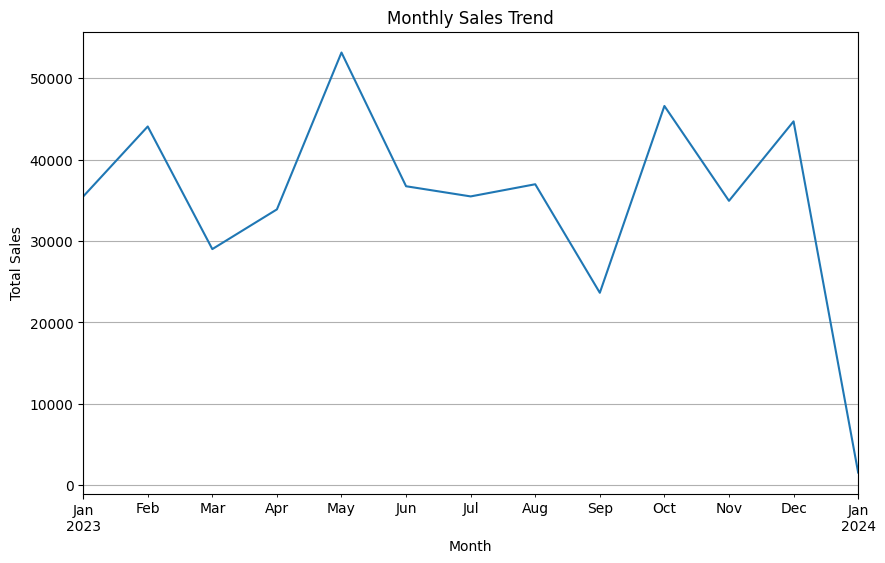

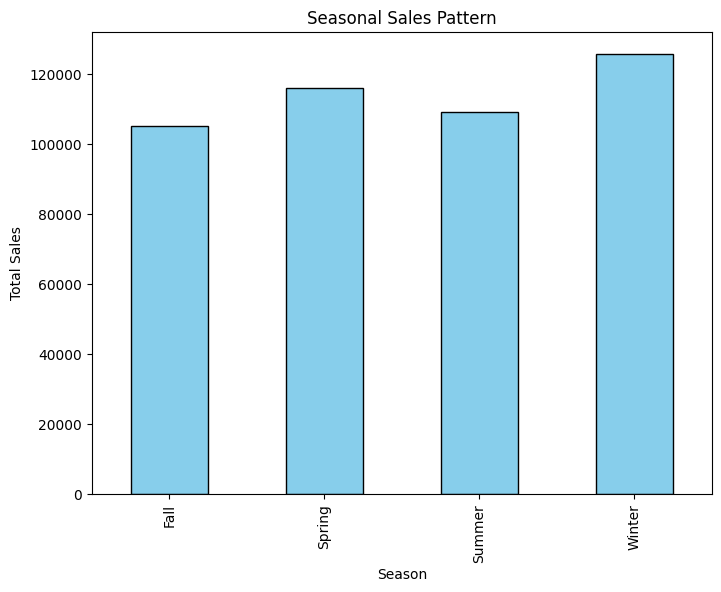

계절별 매출:
Season
Fall      105120
Spring    116010
Summer    109140
Winter    125730
Name: Total Amount, dtype: int64


In [ ]:
# 월별, 계절별 고객 구매 패턴/트렌드

# 월별 구매 패턴
monthly_pattern = data.groupby(data['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_pattern.index = monthly_pattern.index.to_timestamp()  # 인덱스를 타임스탬프로 변환

# 시각화: 월별 매출
monthly_pattern.plot(figsize=(10, 6), title='Monthly Sales Trend', xlabel='Month', ylabel='Total Sales', grid=True)
plt.show()

# 계절별 구매 패턴 (계절 계산)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Month'].apply(get_season)
season_sales = data.groupby('Season')['Total Amount'].sum()

# 시각화: 계절별 매출
season_sales.plot(kind='bar', figsize=(8, 6), title='Seasonal Sales Pattern', xlabel='Season', ylabel='Total Sales', color='skyblue', edgecolor='black')
plt.show()

# 계절별 매출 출력
print("계절별 매출:")
print(season_sales)

월별 총 매출:
Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


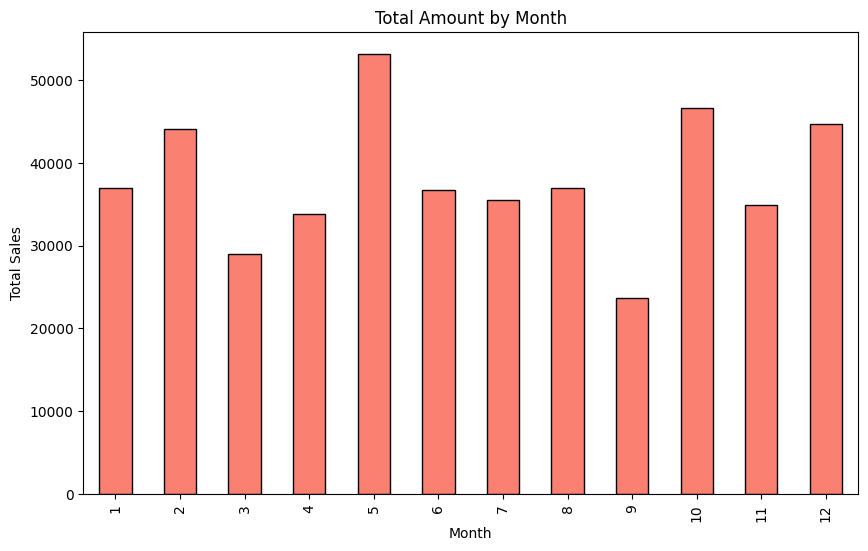

In [ ]:
# 월별 Total Amount(총 금액)

# 월별 총 매출 계산
monthly_total_sales = data.groupby('Month')['Total Amount'].sum()

# 출력
print("월별 총 매출:")
print(monthly_total_sales)

# 시각화: 월별 총 매출
monthly_total_sales.plot(kind='bar', figsize=(10, 6), title='Total Amount by Month', xlabel='Month', ylabel='Total Sales', color='salmon', edgecolor='black')
plt.show()

# 2. 심화 분석 및 시각화

## 매출 트렌드 분석 및 예측

In [ ]:
# 각 카테고리 별 매출 구성비

# 카테고리별 총 매출 계산
category_sales = data.groupby('Product Category')['Total Amount'].sum()

# 매출 구성비 계산
category_sales_ratio = (category_sales / category_sales.sum()) * 100

# 출력
print("카테고리별 매출 구성비 (%):")
print(category_sales_ratio)

카테고리별 매출 구성비 (%):
Product Category
Beauty         31.472588
Clothing       34.118421
Electronics    34.408991
Name: Total Amount, dtype: float64


In [ ]:
# 가장 많은 매출 기여를 하고 있는 카테고리

# 매출이 가장 많은 카테고리 찾기
top_category = category_sales.idxmax()  # 가장 매출이 많은 카테고리
top_category_sales = category_sales.max()  # 해당 매출 값

print(f"가장 많은 매출 기여를 하고 있는 카테고리: {top_category}, 매출: {top_category_sales} 원")

가장 많은 매출 기여를 하고 있는 카테고리: Electronics, 매출: 156905 원


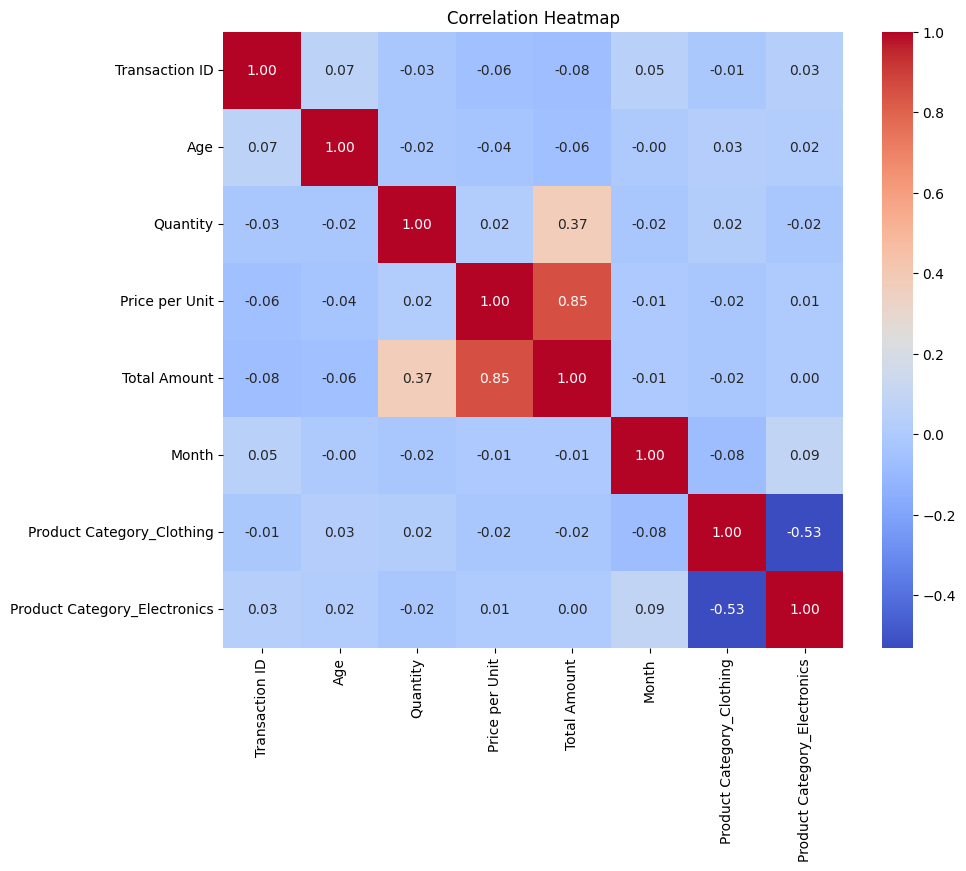

Total Amount와 상관관계가 높은 변수들:
Total Amount                    1.000000
Price per Unit                  0.851925
Quantity                        0.373707
Product Category_Electronics    0.003589
Month                          -0.005197
Product Category_Clothing      -0.016755
Age                            -0.060568
Transaction ID                 -0.075034
Name: Total Amount, dtype: float64


In [ ]:
# 미래 고객 행동, 판매 패턴에 대한 예측 (매출에 영향을 미치는 요인 도출)

from sklearn.preprocessing import OneHotEncoder

data['Date'] = pd.to_datetime(data['Date'])

# 범주형 변수 인코딩 -> Product Category
encoder = OneHotEncoder(sparse_output=False, drop='first')
categories_encoded = encoder.fit_transform(data[['Product Category']])
categories_df = pd.DataFrame(categories_encoded, columns=encoder.get_feature_names_out(['Product Category']))

data_encoded = pd.concat([data, categories_df], axis=1)

# 독립변수(X)와 종속변수(y) 설정
X = data_encoded[['Quantity', 'Age'] + list(categories_df.columns)]
y = data_encoded['Total Amount']

numeric_data = data_encoded.select_dtypes(include=['number'])

# 상관관계 분석
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 주요 요인 확인
print("Total Amount와 상관관계가 높은 변수들:")
print(correlation_matrix['Total Amount'].sort_values(ascending=False))

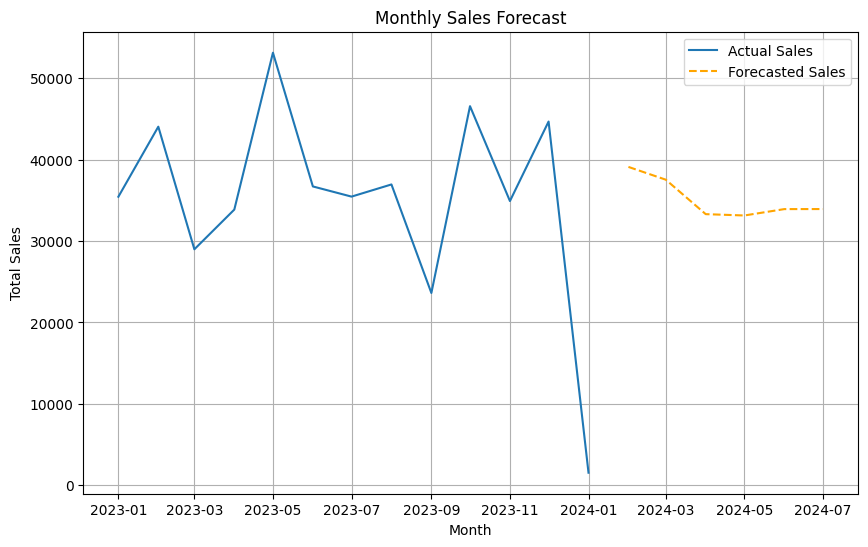

12개월 예측 매출:
2024-02-01    39115.537362
2024-03-01    37545.509919
2024-04-01    33309.866393
2024-05-01    33146.010853
2024-06-01    33929.477816
2024-07-01    33936.260748
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# 시계열 분석으로 미래 매출 예측하기 -> ARIMA 사용!

from statsmodels.tsa.arima.model import ARIMA

# 월별 매출 데이터 생성
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# ARIMA 모델 생성 및 학습
model = ARIMA(monthly_sales, order=(3, 1, 1))  # p, d, q 값 설정
model_fit = model.fit()

# 미래 예측
forecast = model_fit.forecast(steps=6)  # 향후 6개월 예측

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', linestyle='--', color='orange')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

print(f"12개월 예측 매출:\n{forecast}")

## 핵심 인사이트 시각화

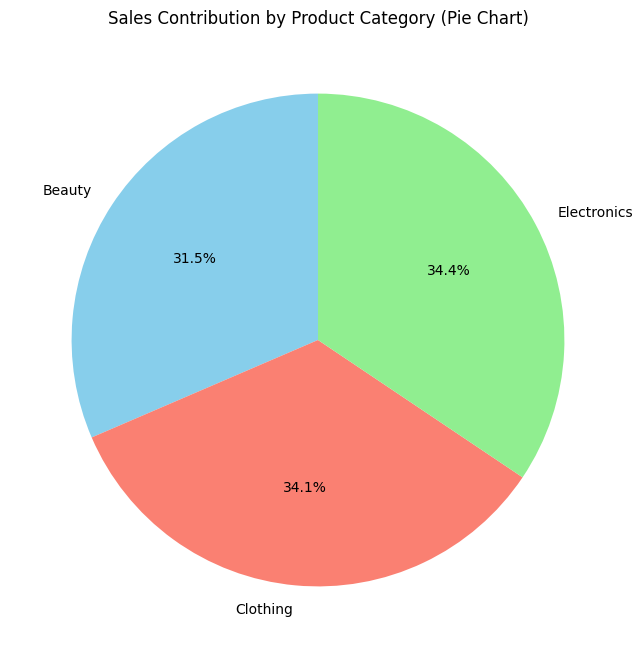

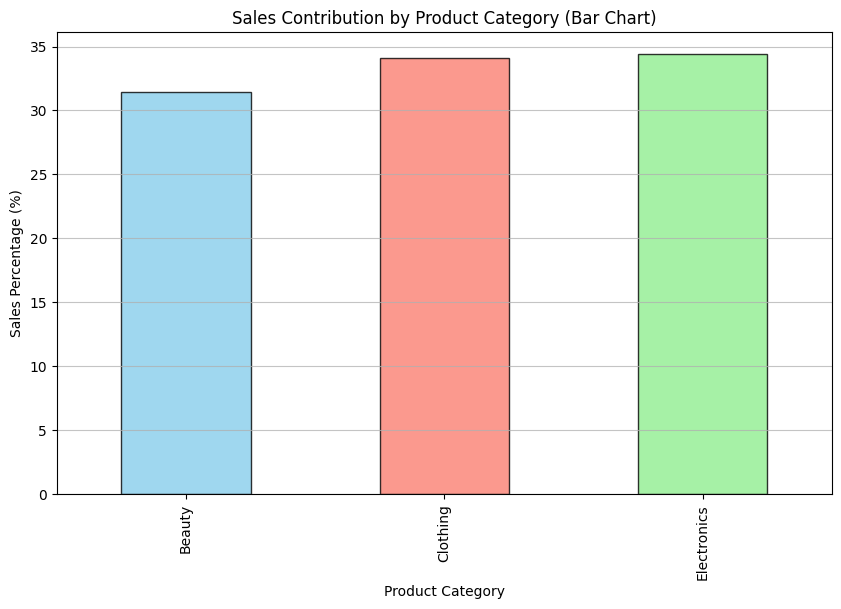

In [ ]:
# 제품 카테고리 별 매출 비율 시각화 (pie chart, bar chart)
### (Bar Chart는 위에서 이미 진행한 코드도 있습니다!)

# 카테고리별 매출 합계 계산
category_sales = data.groupby('Product Category')['Total Amount'].sum()

# 전체 매출에서 카테고리별 비율 계산
category_sales_ratio = (category_sales / category_sales.sum()) * 100

# 1. 파이 차트 시각화
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Sales Contribution by Product Category (Pie Chart)')
plt.ylabel('')  # Y축 레이블 제거
plt.show()

# 2. 막대 차트 시각화
plt.figure(figsize=(10, 6))
category_sales_ratio.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'], edgecolor='black', alpha=0.8)
plt.title('Sales Contribution by Product Category (Bar Chart)')
plt.xlabel('Product Category')
plt.ylabel('Sales Percentage (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

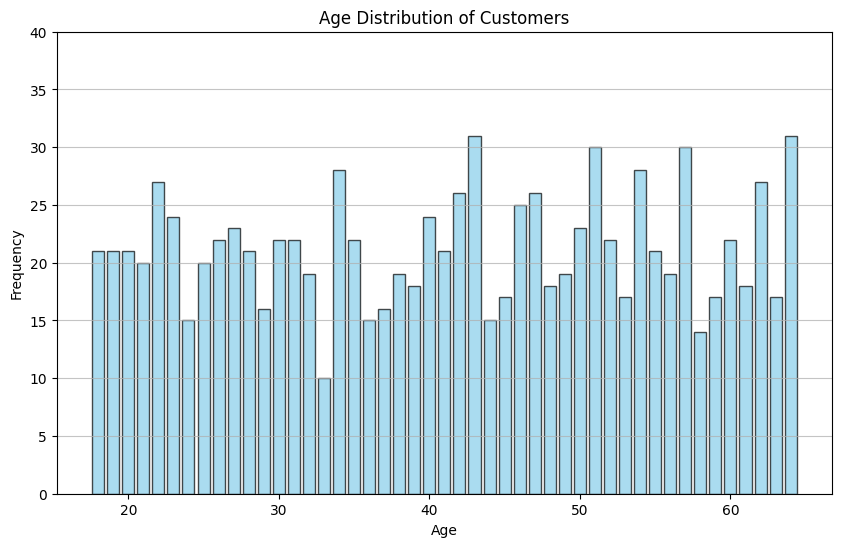

In [ ]:
# 고객의 연령 분포 히스토그램으로 시각화

age_counts = data['Age'].value_counts().sort_index()  # 나이와 등장 횟수

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim(0, 40)  # Y축 범위 설정 (최대 40회로 제한하였습니다!)
plt.grid(axis='y', alpha=0.75)
plt.show()

특정 연령대가 주로 구매를 하는지 확인할 수 있나요?

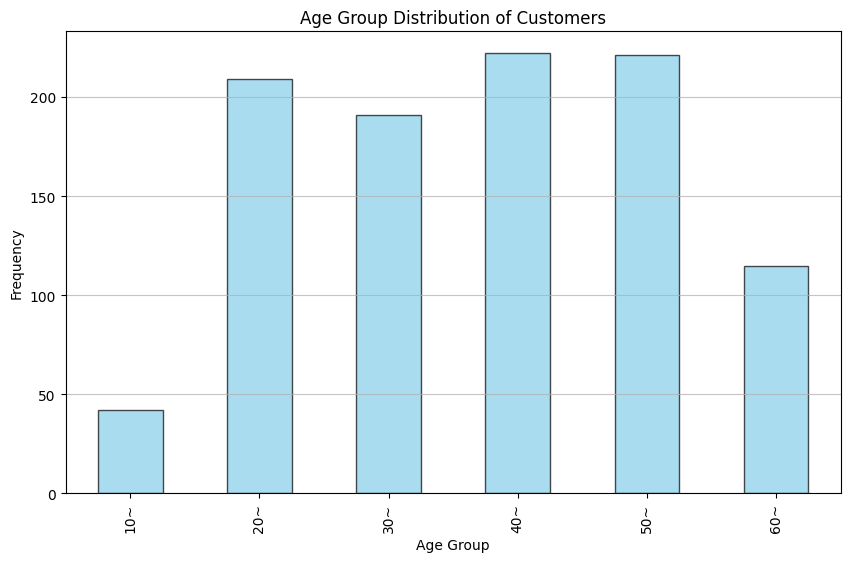

연령대별 구매 횟수:
Age Group
10~     42
20~    209
30~    191
40~    222
50~    221
60~    115
Name: count, dtype: int64


In [ ]:
### 연령대별 구매 분포를 확인하기

# 연령대를 나누는 기준 설정 (10대, 20대, ..., 60대)
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10~', '20~', '30~', '40~', '50~', '60~']

# 연령대 그룹 추가
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 연령대별 등장 횟수 계산
age_group_counts = data['Age Group'].value_counts().sort_index()

# 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Group Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 연령대별 구매 횟수 출력
print("연령대별 구매 횟수:")
print(age_group_counts)

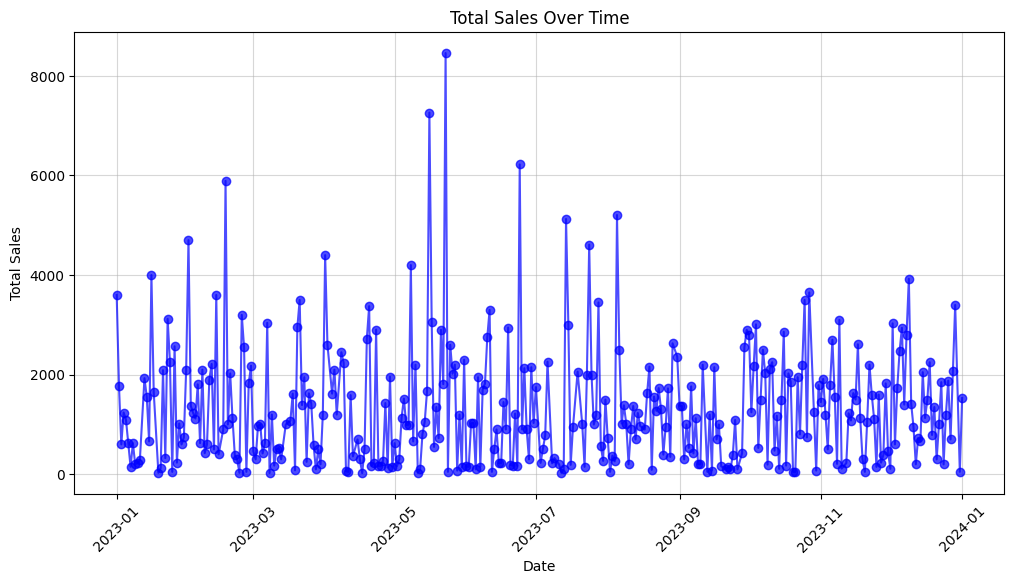

In [ ]:
# 시간에 따른 총 매출 변화 시각화 (line chart)

data['Date'] = pd.to_datetime(data['Date'])

# 날짜별 총 매출 계산
daily_sales = data.groupby('Date')['Total Amount'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='blue', linestyle='-', marker='o', alpha=0.7)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(axis='both', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

월 별로 매출 트렌드가 명확하게 보이나요?

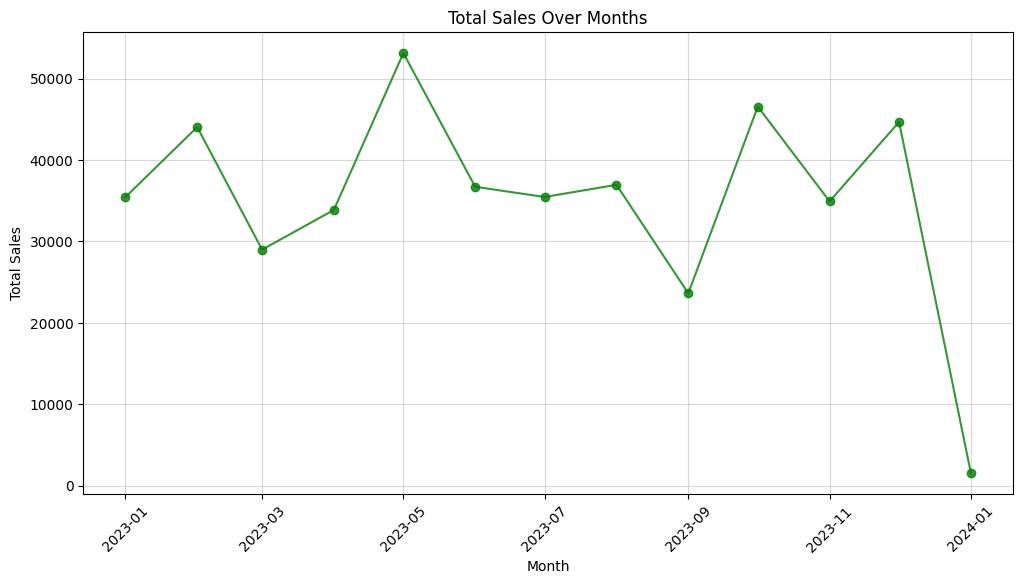

In [ ]:
### 월별 매출 트렌드

# 월별 매출 계산
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, color='green', linestyle='-', marker='o', alpha=0.8)
plt.title('Total Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='both', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


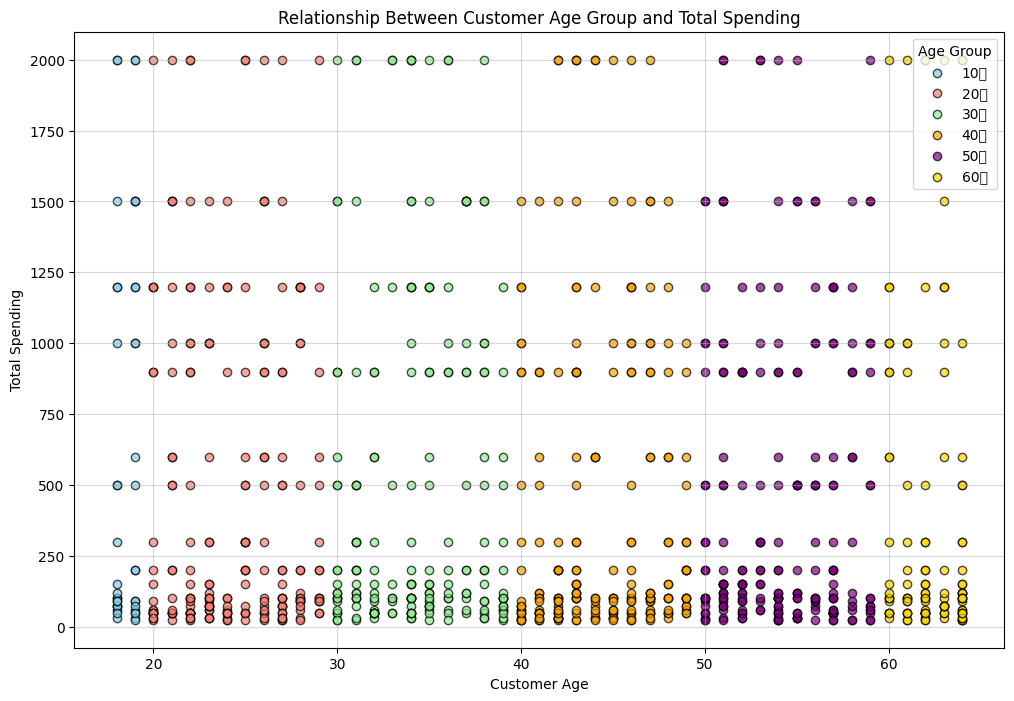

In [ ]:
# 고객 연령과 총 지출 사이의 관계 산점도

### Age와 Total Amount 간의 산점도 시각화
# 연령대 구간 설정 및 라벨 추가
bins = [10, 20, 30, 40, 50, 60, 70]  # 연령대 구간
labels = ['10대', '20대', '30대', '40대', '50대', '60대']  # 구간 레이블
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 색상 설정
colors = {'10대': 'skyblue', '20대': 'salmon', '30대': 'lightgreen', '40대': 'orange', '50대': 'purple', '60대': 'gold'}

# 산점도 시각화
plt.figure(figsize=(12, 8))
for age_group, color in colors.items():
    subset = data[data['Age Group'] == age_group]
    plt.scatter(subset['Age'], subset['Total Amount'], alpha=0.7, color=color, label=age_group, edgecolor='black')

# 그래프 레이블 및 설정
plt.title('Relationship Between Customer Age Group and Total Spending')
plt.xlabel('Customer Age')
plt.ylabel('Total Spending')
plt.grid(alpha=0.5)
plt.legend(title='Age Group')
plt.show()

고가 고객 그룹을 식별할 수 있나요?

In [ ]:
# 고가 고객 기준 : 상위 10%를 고가 고객으로 정의하였습니다!
threshold = data['Total Amount'].quantile(0.9)  # 상위 10% 지출 기준

# 고가 고객 여부 식별
data['High Value Customer'] = data['Total Amount'] >= threshold

# 고가 고객 그룹 출력
high_value_customers = data[data['High Value Customer']]

print(f"고가 고객 기준 (지출 상위 10%): {threshold:.2f}")
print(f"고가 고객 수: {len(high_value_customers)}")
print(high_value_customers[['Customer ID', 'Total Amount', 'Age']])

고가 고객 기준 (지출 상위 10%): 1200.00
고가 고객 수: 153
    Customer ID  Total Amount  Age
12      CUST013          1500   22
14      CUST015          2000   42
15      CUST016          1500   19
30      CUST031          1200   44
45      CUST046          1200   20
..          ...           ...  ...
941     CUST942          1500   51
942     CUST943          1200   57
945     CUST946          2000   62
955     CUST956          1500   30
969     CUST970          2000   59

[153 rows x 3 columns]


고가 고객 기준 (지출 상위 10%): 1200.00
고가 고객들의 연령대 분포:
Age Group
10~    12
20~    35
30~    35
40~    29
50~    29
60~    13
Name: count, dtype: int64


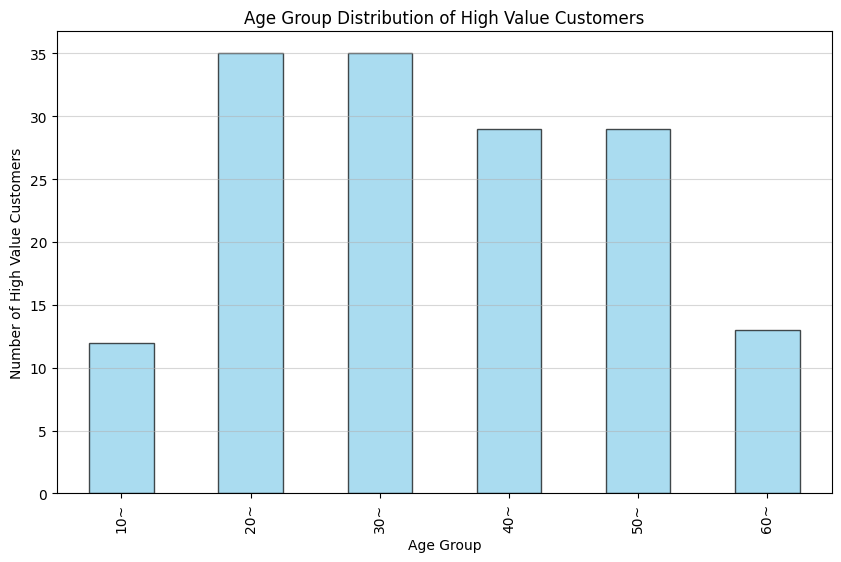

In [ ]:
# 고가 고객 연령대 구간 설정 및 라벨 추가
bins = [10, 20, 30, 40, 50, 60, 70]  # 연령대 구간
labels = ['10~', '20~', '30~', '40~', '50~', '60~']  # 구간 레이블
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 고가 고객 기준 설정 (상위 10%를 고가 고객으로 정의)
threshold = data['Total Amount'].quantile(0.9)  # 상위 10% 지출 기준

# 고가 고객 필터링
data['High Value Customer'] = data['Total Amount'] >= threshold
high_value_customers = data[data['High Value Customer']]

# 고가 고객들의 연령대별 분포 계산
age_group_distribution = high_value_customers['Age Group'].value_counts().sort_index()

# 결과 출력
print(f"고가 고객 기준 (지출 상위 10%): {threshold:.2f}")
print("고가 고객들의 연령대 분포:")
print(age_group_distribution)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Group Distribution of High Value Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of High Value Customers')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
age_group_sales = high_value_customers.groupby('Age Group')['Total Amount'].sum()
print("연령대별 고가 고객 매출 기여도:")
print(age_group_sales)

# 확인 결과 20대와 30대 연령의 고객이 고가 매출에 기여한 주요 연령층 입니다.

연령대별 고가 고객 매출 기여도:
Age Group
10~    18800
20~    52200
30~    55500
40~    45500
50~    44300
60~    21500
Name: Total Amount, dtype: int64


<ipython-input-80-e1214bedc527>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = high_value_customers.groupby('Age Group')['Total Amount'].sum()


# 추가 분석

혹시 추가로 진행한 분석이 있다면, 함께 작성해주세요.

In [ ]:
### 1. 고가 고객과 일반 고객의 평균 구매 패턴 비교
# : 고가 고객과 일반 고객의 평균 구매 금액(Total Amount)과 구매 횟수(Quantity)를 비교하였습니다

# 고가 고객과 일반 고객으로 데이터 분리
general_customers = data[~data['High Value Customer']]

# 평균 구매 금액과 구매 횟수 비교
comparison = pd.DataFrame({
    'Average Spending': [
        high_value_customers['Total Amount'].mean(),
        general_customers['Total Amount'].mean()
    ],
    'Average Quantity': [
        high_value_customers['Quantity'].mean(),
        general_customers['Quantity'].mean()
    ]
}, index=['High Value Customers', 'General Customers'])

# 결과 출력과 시각화로 확인
print("고가 고객과 일반 고객의 평균 구매 패턴:")
print(comparison)

고가 고객과 일반 고객의 평균 구매 패턴:
                      Average Spending  Average Quantity
High Value Customers       1554.248366          3.673203
General Customers           257.615112          2.304604


In [ ]:
### 2. 고가 고객의 제품 카테고리 선호도 분석
# : 고가 고객들이 어떤 제품 카테고리를 선호하는지 분석하였습니다

# 고가 고객의 제품 카테고리별 매출 합계 계산
high_value_category_sales = high_value_customers.groupby('Product Category')['Total Amount'].sum()

# 전체 고객의 제품 카테고리별 매출 합계 계산
total_category_sales = data.groupby('Product Category')['Total Amount'].sum()

# 고가 고객 매출 비중 계산
category_preference = (high_value_category_sales / total_category_sales) * 100

# 가장 높은 매출 비중의 카테고리 식별
top_category = category_preference.idxmax()
top_percentage = category_preference.max()

# 결과 출력
print(f"고가 고객이 가장 많이 구매한 카테고리: {top_category} ({top_percentage:.2f}%)")

고가 고객이 가장 많이 구매한 카테고리: Electronics (52.90%)


<ipython-input-90-9920edb061a5>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_category_sales = data.groupby(['Season', 'Product Category'])['Total Amount'].sum()
<ipython-input-90-9920edb061a5>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_by_season = season_category_sales.groupby('Season').idxmax()
<ipython-input-90-9920edb061a5>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_sales_b


계절별로 가장 많이 팔린 카테고리:

Spring: Clothing (46460.00)
Summer: Electronics (41390.00)
Fall: Clothing (38490.00)
Winter: Electronics (45610.00)


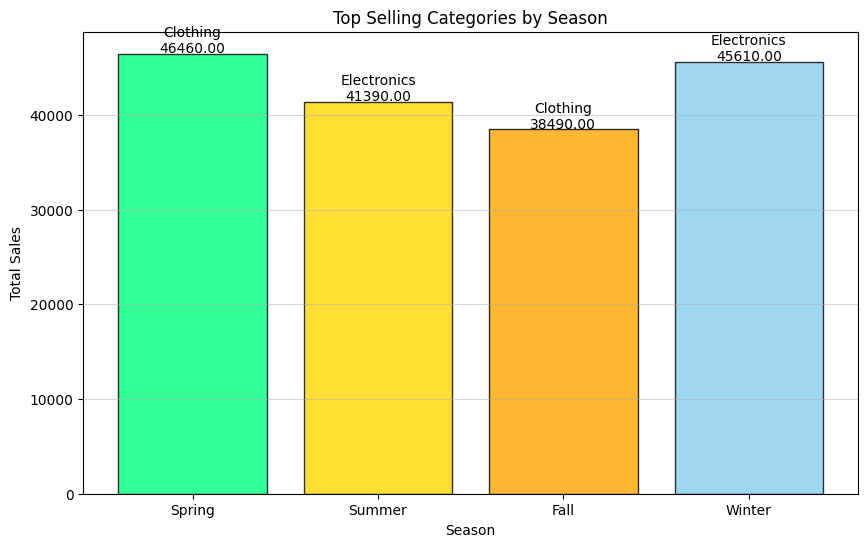

In [ ]:
### 3. 계절별로 가장 많이 팔린 카테고리 확인
# : 계절에따라 어떤 제품 카테고리가 많이 팔렸는 분석하였습니다

# 계절 순서 지정
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# 계절 데이터에 순서 설정
data['Season'] = pd.Categorical(data['Season'], categories=season_order, ordered=True)

# 계절별 제품 카테고리별 매출 합계 계산
season_category_sales = data.groupby(['Season', 'Product Category'])['Total Amount'].sum()

# 계절별로 가장 많이 팔린 카테고리 계산
top_categories_by_season = season_category_sales.groupby('Season').idxmax()
top_sales_by_season = season_category_sales.groupby('Season').max()

# 결과 출력
print("\n계절별로 가장 많이 팔린 카테고리:\n")
for season, (season_cat, total_sales) in zip(top_categories_by_season.index, zip(top_categories_by_season.values, top_sales_by_season.values)):
    print(f"{season}: {season_cat[1]} ({total_sales:.2f})")

# 계절별 색상 지정
season_colors = ['springgreen', 'gold', 'orange', 'skyblue']  # 봄, 여름, 가을, 겨울 색상

# 시각화: 계절별로 가장 많이 팔린 카테고리
plt.figure(figsize=(10, 6))
plt.bar(top_categories_by_season_df.index, top_categories_by_season_df['Total Sales'],
        color=season_colors, edgecolor='black', alpha=0.8)

# 막대 위에 카테고리 이름과 매출 값 표시
for i, val in enumerate(top_categories_by_season_df['Total Sales']):
    plt.text(i, val + 100, f"{top_categories_by_season_df['Category'][i]}\n{val:.2f}", ha='center')

# 그래프 레이블 및 설정
plt.title('Top Selling Categories by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.grid(axis='y', alpha=0.5)
plt.show()
plt.show()